Using time step: 0.0100


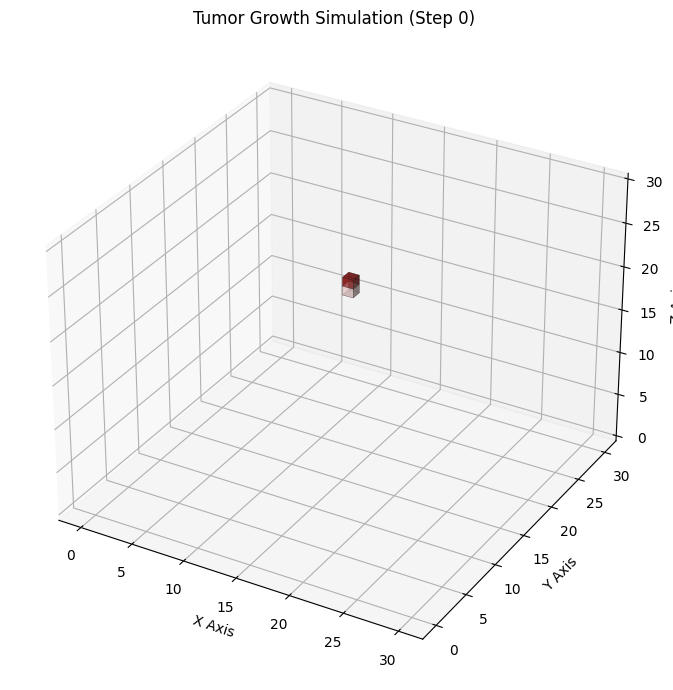

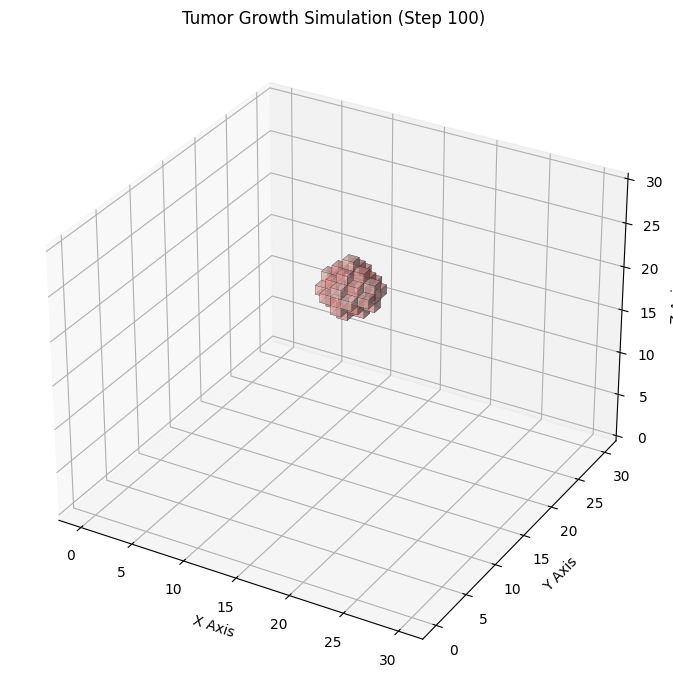

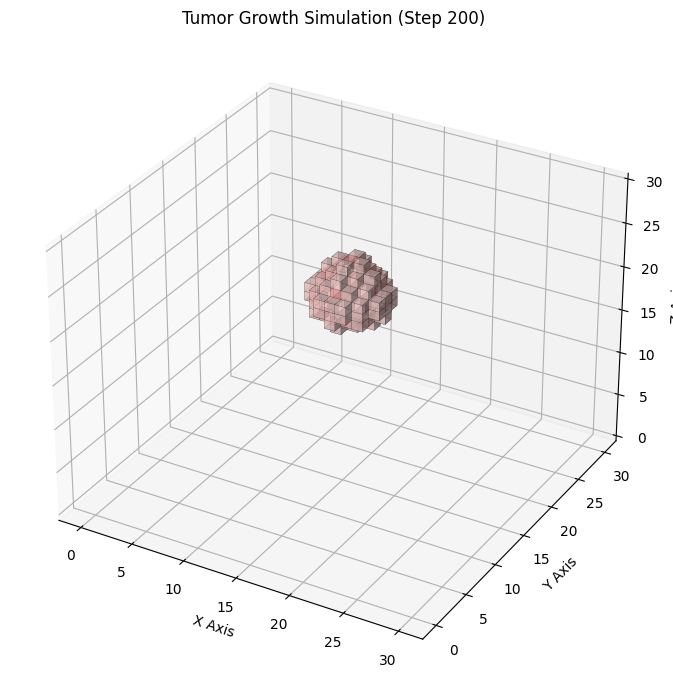

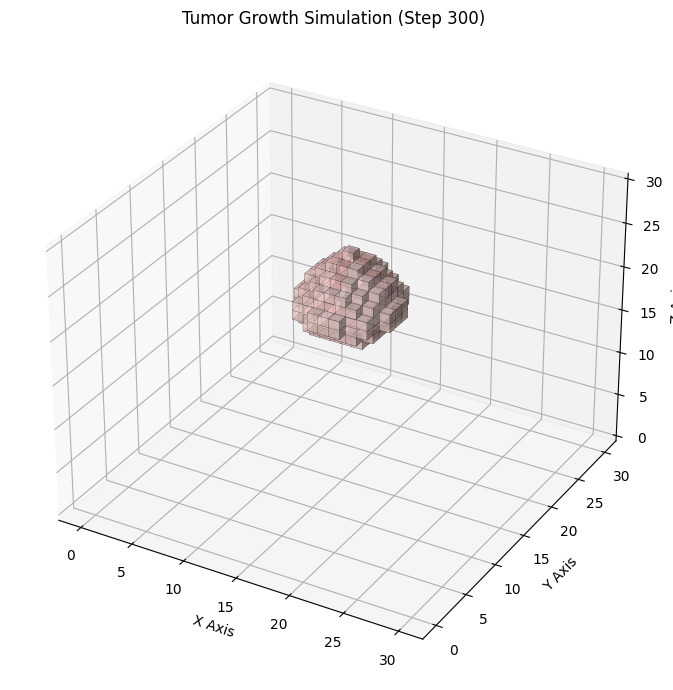

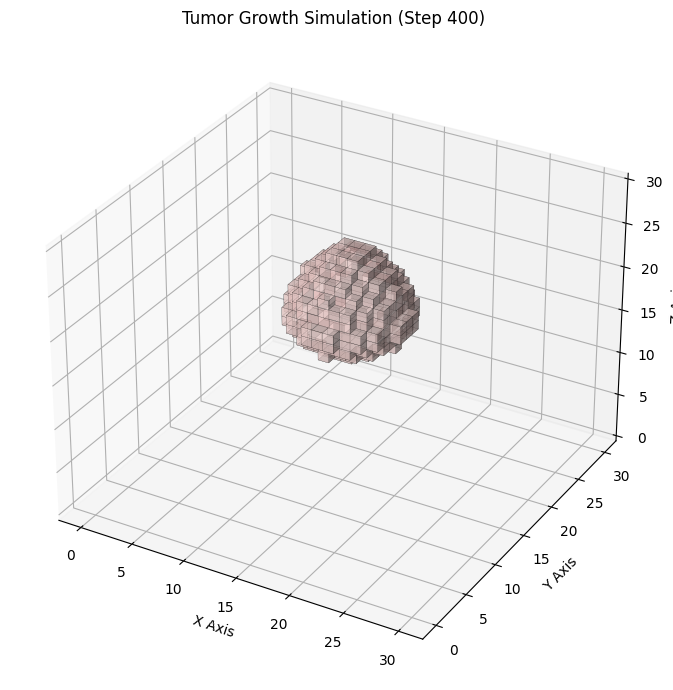

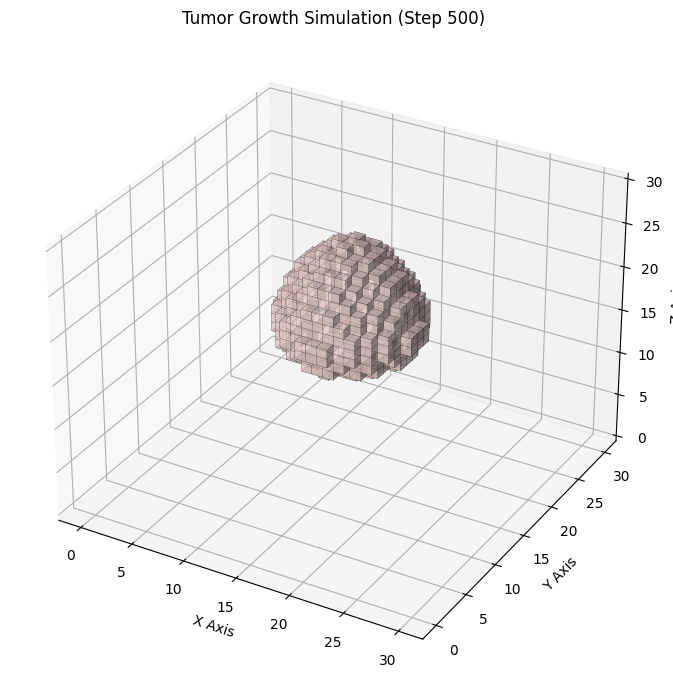

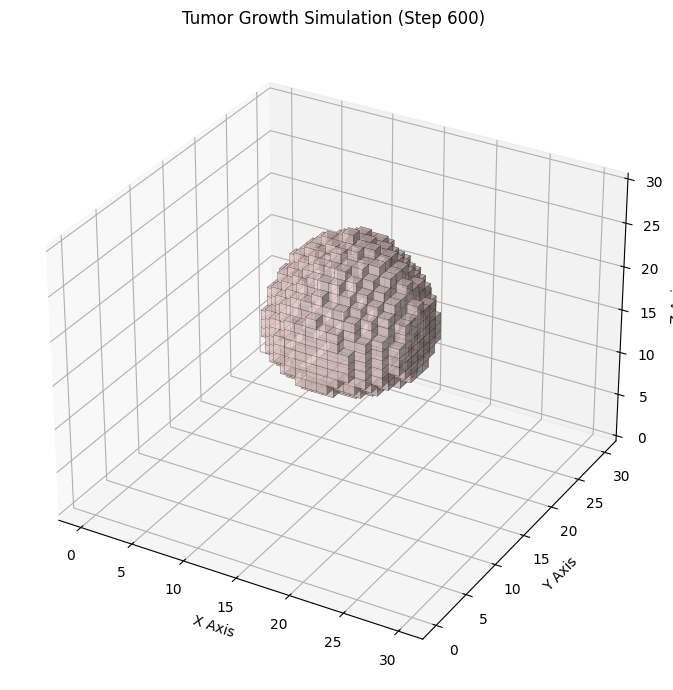

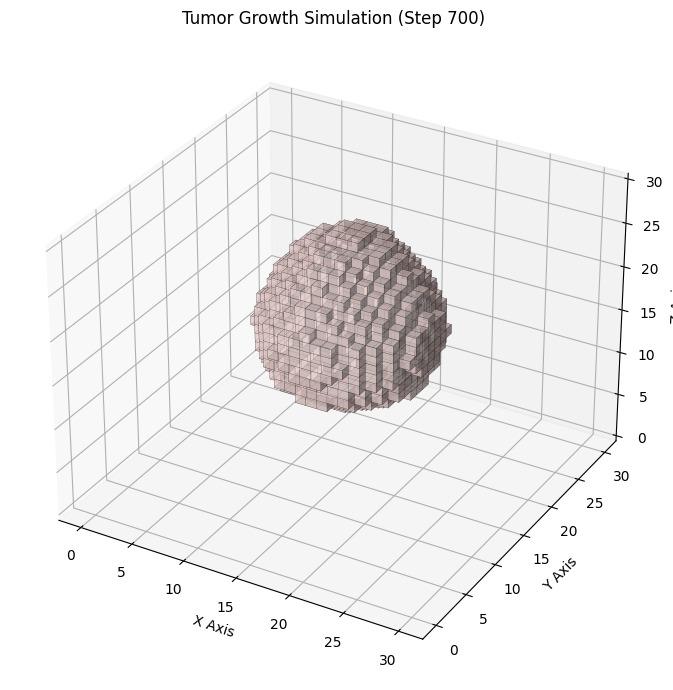

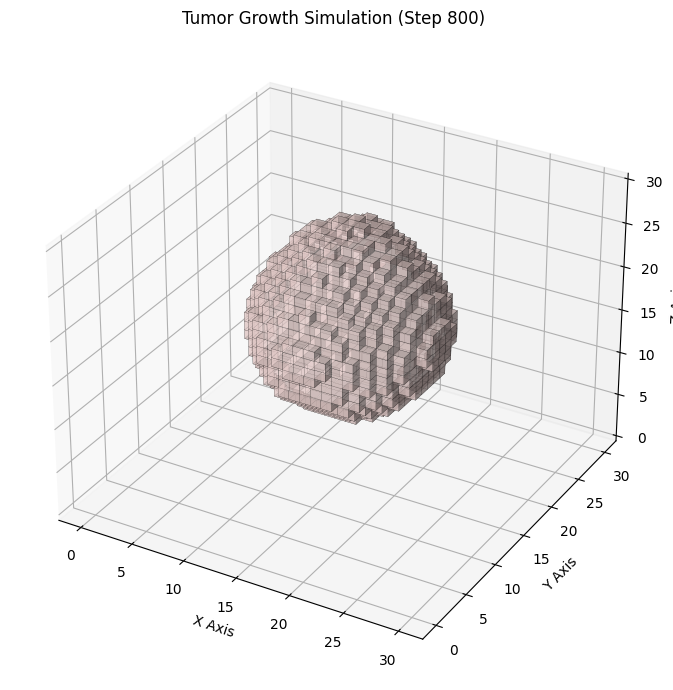

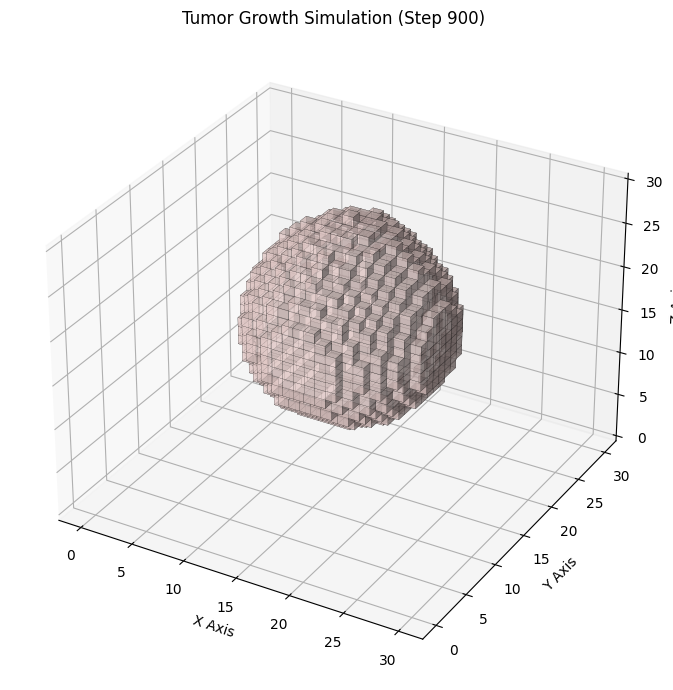

Generated 100 observations and 100 prediction points
Observation range: [0.002, 0.844]


In [13]:
import TumorSimulator
import numpy as np
t,nx,ny,nz=10,30,30,30 
n_I=100
n_pred=100
simulator =  TumorSimulator.TumorSimulation(
        nx=nx, ny=ny, nz=nz,
        D_w=0.1, 
        r=1.0,
        num_steps=1000
    )
    
simulator.run_simulation(visualize_interval=100)
simulator.generate_observations(num_obs=n_I, num_pred=n_pred)

Using time step: 0.0100


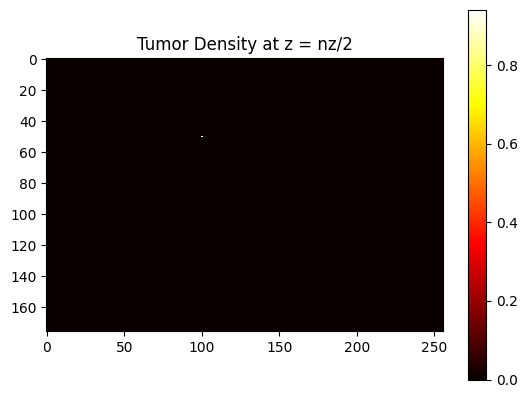

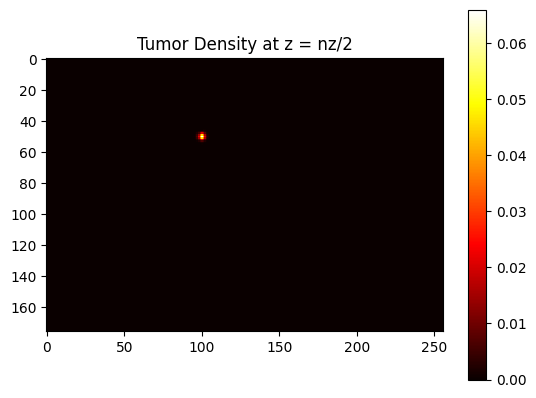

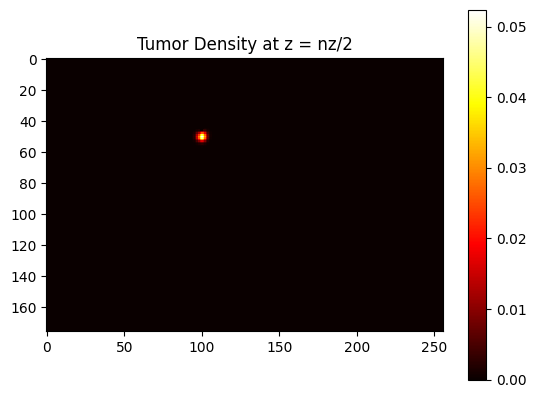

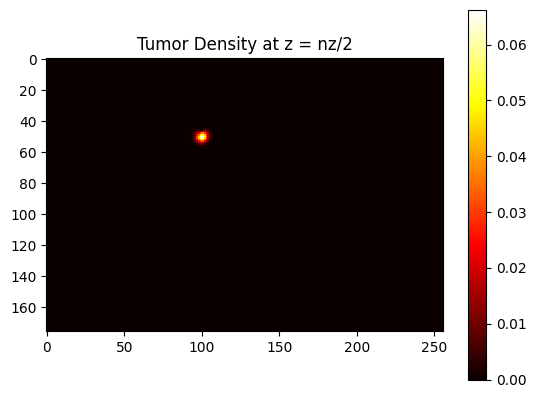

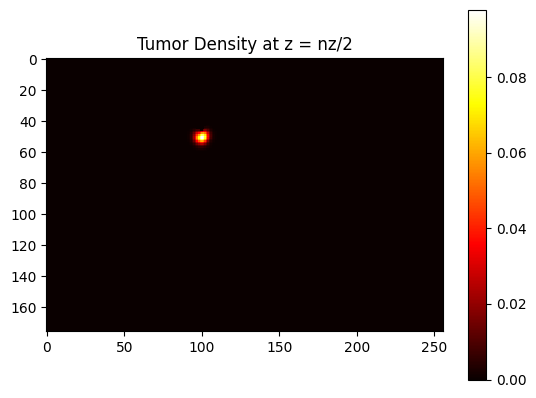

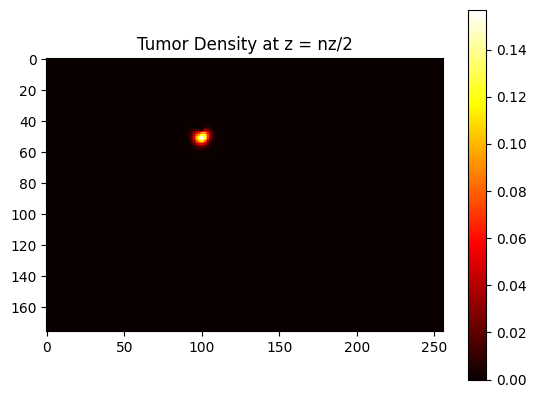

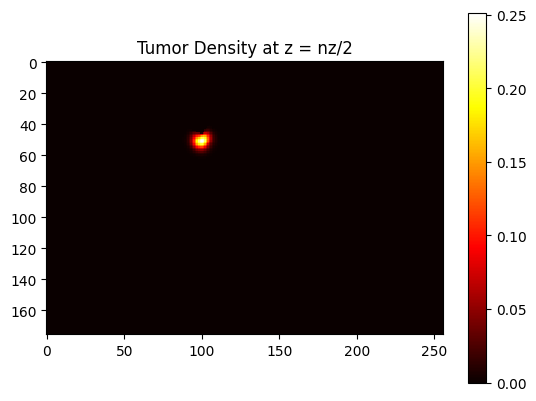

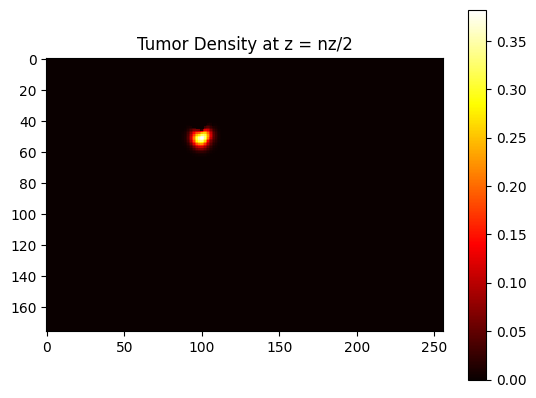

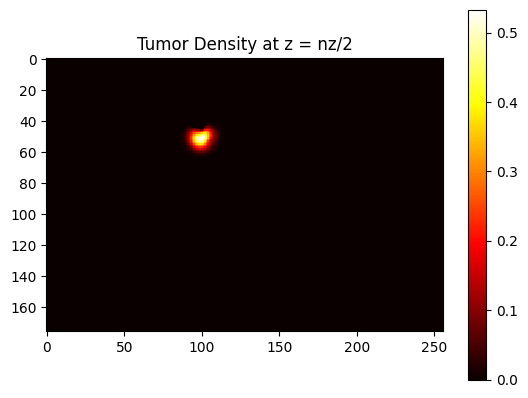

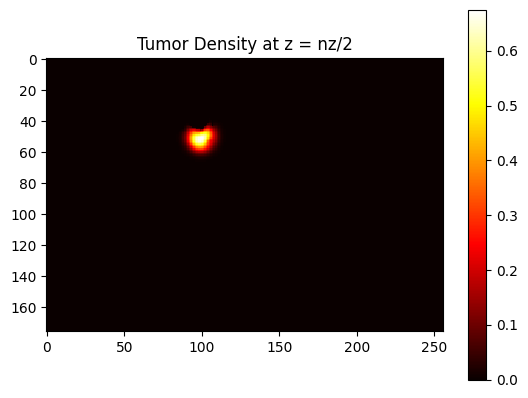

Generated 100 observations and 100 prediction points
Observation range: [0.005, 0.729]


In [1]:
import nibabel as nib
import numpy as np
import TumorSimulator
file_path = 'C:/Users/1547726165/Desktop/Flanker/sub-08/anat/c1sub-08_T1w.nii' 
nii_image = nib.load(file_path)
D_w=1e-6
D_g=10*D_w
image_data = nii_image.get_fdata()  # 以 NumPy 数组的形式获取图像数据
D=D_g/(image_data+1e-5)+D_w/(1-image_data+1e-5)
nx,ny,nz=D.shape
t=10
simulator =  TumorSimulator.TumorSimulation(
        nx=nx, ny=ny, nz=nz,
        D_w=D_w, 
        r=1.0,
        num_steps=1000,
        flag=False
    )
n_I=100
n_pred=100
simulator.D=D
simulator.run_simulation(visualize_interval=100)
simulator.generate_observations(num_obs=n_I, num_pred=n_pred)

In [ ]:
import numpy as np
import dill
import nibabel as nib
import pickle
import torch
import Two_Stage_Method # 
#import matplotlib.pyplot as plt
#import pyswarms
import MAGI_PDE_Infer
import Generating_data # 
#n_I=100
#n_pred=100
lsteps=200
epsilon=1e-5
operator=0
source_term=1
if(source_term==0):
    D=np.load('D.npy')
    size=[t,nx,ny,nz]
elif(source_term==1):
    file_path = 'C:/Users/1547726165/Desktop/Flanker/sub-08/anat/c1sub-08_T1w.nii' 
    nii_image = nib.load(file_path)
    D_w=1e-6
    D_g=10*D_w
    image_data = nii_image.get_fdata()  # 以 NumPy 数组的形式获取图像数据
    t=10
    D=image_data
    nx,ny,nz=D.shape
    n_I=100
    n_pred=100
    size=[t,nx,ny,nz]
PDEmodel=Generating_data.Generating_data(boundary_condition = False, pde_operator = operator, source_term = source_term, sigma_e=0.001, noisy_known = True, n_obs =n_pred, n_I = n_I,D=D,size=size)



loading
Standard diviation of data 0.1891236360466453
Optimizing GP parameter


c:\Users\1547726165\Desktop\PIGPI-main\GP_processing.py:274: OptimizeWarning: Unknown solver options: ftol
  res1 = minimize(self.Loss_mle,start_1, args=(train_x,train_y,sigma_e,kernel, n_obs), method='Nelder-Mead', bounds=bnds, options={'ftol': 1e-6,})
c:\Users\1547726165\Desktop\PIGPI-main\GP_processing.py:611: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3575.)
  mean = ((a/e).T @ b) / ((a/e).T @ a)
c:\Users\1547726165\Desktop\PIGPI-main\GP_processing.py:275: OptimizeWarning: Unknown solver options: ftol
  res2 = minimize(self.Loss_mle,start_2, args=(train_x,train_y,sigma_e,kernel, n_obs), method='Nelder-Mead', bounds=bnds, options={'ftol': 1e-6,})


Initial Optimization: [1.00000000e-06 4.85542732e+00 6.73753781e+00 4.17172609e+00
 2.73177284e+00]
tensor([[6.1157]], grad_fn=<AddBackward0>)
GP_var tensor(0.0247) Noise_var tensor(1.0000e-06) GP_parameter [2.49037938 4.55310105 3.14579119 2.16443675] Standardized [0.27670882 0.19796092 0.10847556 0.12024649]
Time for training GP: 1734  secs


In [4]:
import MAGI_PDE_Infer
import Generating_data # 
magi= MAGI_PDE_Infer.MAGI_PDE_Infer(PDEmodel, KL=False) # call inference class
magi.cheat = 0
magi.Sample_Using_HMC(n_epoch = 5000, lsteps=lsteps, epsilon=epsilon, n_samples=20000, Normal_Approxi_Only = True)
#magi.Sample_Using_HMC(n_epoch = 2000, lsteps=lsteps, epsilon=epsilon, n_samples=2000, Normal_Approxi_Only = False)

Optimizing GP parameter
Initial Optimization: [1.00000000e-06 5.40711782e+00 5.37840757e+00 3.92472321e+00
 2.43603511e+00]
tensor([[999990.7847]], grad_fn=<AddBackward0>)
GP_var tensor([[0.0020]]) Noise_var tensor([[2.0135e-09]]) GP_parameter [2.81853787 3.25106533 1.93829612 1.07359397] Standardized [0.31317087 0.14135067 0.0668378  0.05964411]
Time for training GP: 1709  secs
start optimiza theta and u:
500 / 5000 current opt: theta: [-3.41067486e-06 -9.00206799e-01] error/out_scale tensor([4.0543e-05])
gradient 5605.212793954838 [5.18431708e+09 2.29808647e+05]
1000 / 5000 current opt: theta: [-3.65479954e-06 -1.01124138e+00] error/out_scale tensor([4.0543e-05])
gradient 1286598.4068640026 [-1.65920634e+10  1.43378599e+08]


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [15]:
print(magi.Map_Estimation['theta_MAP'])
print(magi.posterior_summary['theta_posterior'])

tensor([0.4197, 1.5192])
tensor([[0.4192, 1.5185],
        [0.4170, 1.5143],
        [0.4188, 1.5173],
        ...,
        [0.2316, 1.1738],
        [0.2302, 1.1781],
        [0.2304, 1.1792]])


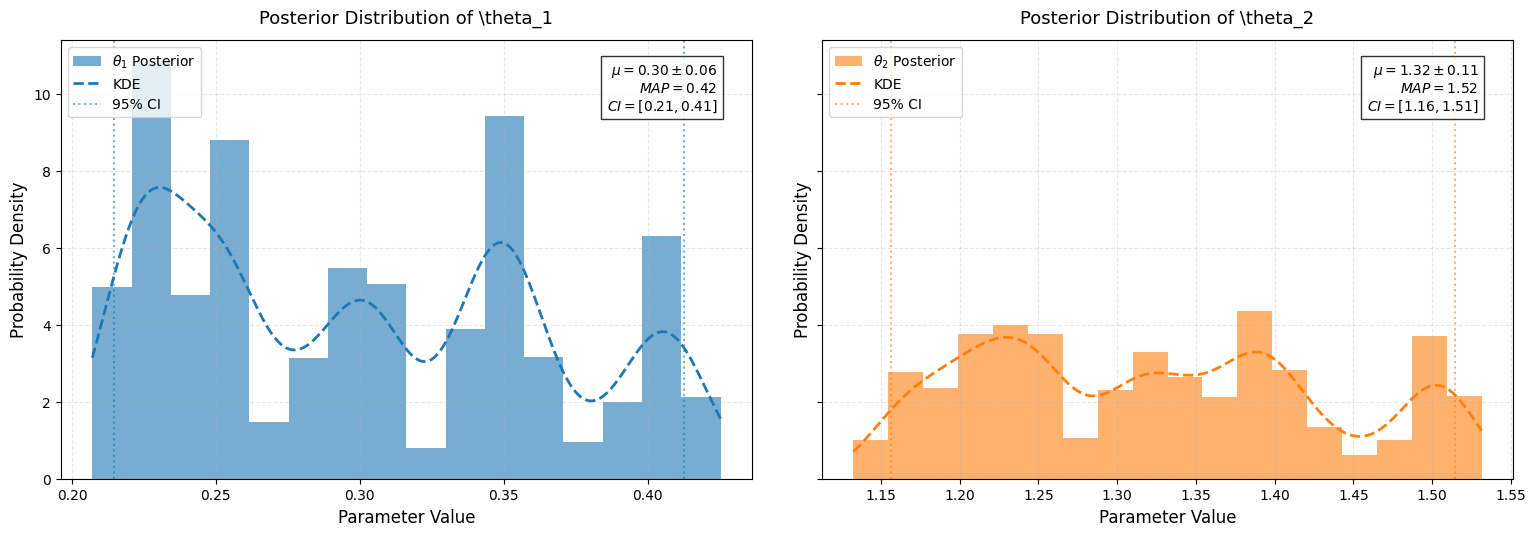

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 数据提取
theta_posterior = magi.posterior_summary['theta_posterior'].cpu().numpy()
theta_MAP = magi.Map_Estimation['theta_MAP'].cpu().numpy()
theta1 = theta_posterior[:, 0]
theta2 = theta_posterior[:, 1]

# 创建画布和子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --------------------------
# θ1 的分布图
# --------------------------
# 颜色配置
colors = {
    'hist': '#1f77b4',
    'kde': '#1f77b4',
    'map': '#d62728',
    'ci': '#1f77b4'
}

# 直方图
n, bins, _ = ax1.hist(theta1, bins='auto', 
                     alpha=0.6, color=colors['hist'],
                     density=True, 
                     label=rf'$\theta_1$ Posterior')

# KDE曲线
kde = gaussian_kde(theta1)
x_range = np.linspace(theta1.min(), theta1.max(), 500)
ax1.plot(x_range, kde(x_range), color=colors['kde'], 
        linestyle='--', linewidth=2, label='KDE')

# MAP估计线
#ax1.axvline(theta_MAP[0], color=colors['map'], linestyle='-.',
#          linewidth=2.5, alpha=0.9, label='MAP')

# 置信区间
ci_low, ci_high = np.percentile(theta1, [2.5, 97.5])
ax1.axvline(ci_low, color=colors['ci'], linestyle=':', 
           linewidth=1.5, alpha=0.6, label='95% CI')
ax1.axvline(ci_high, color=colors['ci'], linestyle=':', 
           linewidth=1.5, alpha=0.6)

# 统计标注
stats_text = (
    rf'$\mu = {np.mean(theta1):.2f} \pm {np.std(theta1):.2f}$' + '\n'
    rf'$MAP = {theta_MAP[0]:.2f}$' + '\n'
    rf'$CI = [{ci_low:.2f}, {ci_high:.2f}]$'
)
ax1.text(0.95, 0.95, stats_text, 
        transform=ax1.transAxes,
        ha='right', va='top',
        bbox=dict(facecolor='white', alpha=0.8))

# --------------------------
# θ2 的分布图
# --------------------------
# 颜色配置

colors = {
    'hist': '#ff7f0e',
    'kde': '#ff7f0e',
    'map': '#2ca02c',
    'ci': '#ff7f0e'
}

# 直方图
ax2.hist(theta2, bins='auto', 
        alpha=0.6, color=colors['hist'],
        density=True, 
        label=rf'$\theta_2$ Posterior')

# KDE曲线
kde = gaussian_kde(theta2)
x_range = np.linspace(theta2.min(), theta2.max(), 500)
ax2.plot(x_range, kde(x_range), color=colors['kde'], 
        linestyle='--', linewidth=2, label='KDE')

# MAP估计线
#ax2.axvline(theta_MAP[1], color=colors['map'], linestyle='-.',
#          linewidth=2.5, alpha=0.9, label='MAP')

# 置信区间
ci_low, ci_high = np.percentile(theta2, [2.5, 97.5])
ax2.axvline(ci_low, color=colors['ci'], linestyle=':', 
           linewidth=1.5, alpha=0.6, label='95% CI')
ax2.axvline(ci_high, color=colors['ci'], linestyle=':', 
           linewidth=1.5, alpha=0.6)

# 统计标注
stats_text = (
    rf'$\mu = {np.mean(theta2):.2f} \pm {np.std(theta2):.2f}$' + '\n'
    rf'$MAP = {theta_MAP[1]:.2f}$' + '\n'
    rf'$CI = [{ci_low:.2f}, {ci_high:.2f}]$'
)
ax2.text(0.95, 0.95, stats_text, 
        transform=ax2.transAxes,
        ha='right', va='top',
        bbox=dict(facecolor='white', alpha=0.8))

# --------------------------
# 通用设置
# --------------------------
for ax in [ax1, ax2]:
    ax.set_xlabel('Parameter Value', fontsize=12)
    ax.set_ylabel('Probability Density', fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='upper left')
    ax.set_title(f'Posterior Distribution of {ax.get_legend().get_texts()[0].get_text().split("$")[1]}', 
                fontsize=13, pad=12)

plt.tight_layout(pad=3.0)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde
# 数据预处理（假设数据为PyTorch张量）
u_pred = magi.posterior_summary['u_pred'].cpu().numpy().flatten()
u_true = magi.posterior_summary['u_pred_true'].cpu().numpy().flatten()
u_pred=u_pred[u_pred>0]
combined_data = np.concatenate([u_pred, u_true])
bins = np.histogram_bin_edges(combined_data, bins='auto')  # 自动选择最佳bins数量
# 生成统一横坐标范围
x_range = np.linspace(min(combined_data), max(combined_data), 500)

# 计算KDE
kde_pred = gaussian_kde(u_pred)
kde_true = gaussian_kde(u_true)

plt.figure(figsize=(10, 6))

# 绘制概率密度直方图
plt.hist(u_pred, 
         bins=bins, 
         alpha=0.5, 
         color='blue', 
         label='Predicted',
         density=True)  

plt.hist(u_true, 
         bins=bins, 
         alpha=0.5, 
         color='orange', 
         label='True',
         density=True)

# 绘制KDE曲线（无需缩放）
plt.plot(x_range, kde_pred(x_range), 
         color='blue', linestyle='--', linewidth=2, label='Predicted KDE')
plt.plot(x_range, kde_true(x_range),
         color='orange', linestyle='--', linewidth=2, label='True KDE')

plt.ylabel('Probability Density')  # 修改坐标轴标签

In [3]:
ts = Two_Stage_Method.Two_Stage_Method(PDEmodel) # call inference class
ts.minimize_msl()

c:\Users\1547726165\Desktop\PIGPI-main\Two_Stage_Method.py:50: OptimizeWarning: Unknown solver options: ftol
  res = minimize(self.mean_square_loss, (torch.tensor(theta_cand[ini,:])), args=(u_dirivatives, pde_operator), method='Nelder-Mead', options={'ftol': 1e-6})


Two-Stage method: [6.63425187e-07 8.10125463e-01] error tensor(0.1343)


{'theta_err': tensor(0.1343),
 'theta_err_relative': tensor(0.2733),
 'theta_ts': tensor([6.6343e-07, 8.1013e-01]),
 'u_dirivatives_ts': tensor([[ 2.6406e-02,  2.4293e-02,  1.1866e-01],
         [ 1.2212e-01, -1.4550e-04,  7.5735e-02],
         [ 4.4157e-01, -7.9023e-02,  1.1267e-01],
         [ 6.1508e-01, -9.4115e-02,  1.1656e-01],
         [ 3.3040e-01, -7.6454e-02,  1.2357e-01],
         [ 6.5632e-01, -5.9502e-02,  1.3822e-01],
         [ 1.0617e-02, -7.8034e-03,  7.6073e-03],
         [ 2.1615e-01, -1.1707e-02,  1.6306e-01],
         [ 5.5351e-01, -9.4522e-02,  1.4749e-01],
         [ 2.8270e-01, -3.3312e-02,  1.6700e-01],
         [ 1.7888e-01, -1.9697e-02,  9.9525e-02],
         [ 5.7650e-01, -5.6936e-02,  9.9147e-02],
         [ 1.4293e-01, -4.0001e-03,  1.0638e-01],
         [ 4.6419e-01, -5.4211e-02,  2.0995e-01],
         [ 7.9118e-02, -7.6707e-03,  4.9098e-02],
         [ 5.8821e-01, -8.6915e-02,  1.1810e-01],
         [ 5.4888e-01, -6.6055e-02,  1.2897e-01],
         [ 9.1

In [ ]:
from nipype.interfaces import spm

# 如果是通过 MATLAB 调用 SPM：
spm.SPMCommand.set_mlab_paths(
    matlab_cmd='F:\matlab\Bin\matlab.exe',  # MATLAB 可执行文件路径
    paths='F:\matlab\toolbox\spm12\spm12\spm.m' 
)
from nipype.interfaces.spm import Info
print(Info.version( matlab_cmd='F:\matlab\Bin\matlab.exe',
    paths='F:\matlab\toolbox\spm12\spm12' ))  # 应输出 SPM 版本（如 'SPM12'）

In [ ]:
import nibabel as nib
import numpy as np


file_path = 'C:/Users/1547726165/Desktop/Flanker/sub-08/anat/c1sub-08_T1w.nii' 
nii_image = nib.load(file_path)


image_data = nii_image.get_fdata()  # 以 NumPy 数组的形式获取图像数据
D=1e-5/(image_data+1e-5)+1e-6/(1-image_data+1e-5)

# 查看文件的基本信息
print("图像数据维度:", image_data.shape)
print("数据类型:", image_data.dtype)
print(image_data[50,100,:])



In [ ]:
import matplotlib.pyplot as plt
mid_slice = image_data.shape[1] // 2 
# 可视化第一个切片
plt.imshow(image_data[:, mid_slice , : ], cmap='gray')  
plt.colorbar()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
nx, ny, nz = D.shape  # 假设D是一个形状为(nx, ny, nz)的3D数组
dx, dy, dz = 1.0, 1.0, 1.0  # 空间步长
dt = 0.01  # 时间步长
r = 1.0  # 生长率
num_steps = 1000  # 时间步数

# 初始化扩散系数 D 和肿瘤密度 u
u = np.zeros((nx, ny, nz))  # 初始肿瘤密度
u[50, 100, nz//2] = 1.0  # 在中心点设置初始肿瘤密度
# 自动计算时间步长
D_max = np.max(D)
dt_max = 0.5 * dx**2 / (6 * D_max)
dt = min(0.01, dt_max)  # 取更严格的时间步长

print(dt)
# 时间迭代
for step in range(num_steps):
    u_new = u.copy()
    
    # 计算拉普拉斯算子
    laplacian = (np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)) / dx**2 + \
                (np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)) / dy**2 + \
                (np.roll(u, -1, axis=2) - 2*u + np.roll(u, 1, axis=2)) / dz**2
    
    # 更新肿瘤密度
    u_new = u + dt * (D * laplacian + r * u * (1 - u))
    
    # 边界条件（假设边界处肿瘤密度为0）
    u_new[0, :, :] = u_new[-1, :, :] = 0
    u_new[:, 0, :] = u_new[:, -1, :] = 0
    u_new[:, :, 0] = u_new[:, :, -1] = 0
    
    u = u_new
    u = np.clip(u_new, 0, 1)
    if step % 100 == 0:
        # 可视化结果 
        plt.imshow(u[:, :, nz//2], cmap='hot', interpolation='nearest')
        plt.colorbar()
        plt.title("Tumor Density at z = nz/2")
        plt.show()


In [ ]:
print(u[50, 100, nz//2] )
plt.figure(figsize=(6, 6))

# 显示第一个图像
plt.imshow(u[:, :, nz//2], cmap='jet', alpha=1.0)  # 设置透明度为0.5
plt.colorbar()

# 显示第二个图像
plt.imshow(image_data[:,:, nz//2], cmap='gray', alpha=0.3)  
plt.colorbar()

# 显示图像
plt.show()
np.save('output.npy',u)
'''
u=np.load('output.npy')
print(u[:,ny//2,nz//2])
3dslicer
'''

In [ ]:
data=np.load('output.npy')
#创建一个 NIfTI图像对象 
# #注意：需要确保 .npy数据的形状和方向与原始 NIfTI文件一致 
nii_img = nib.Nifti1Image(data, affine=np.diag([-1,1, -1,1])) 
# affine是仿射矩阵，需要与实际数据对齐 
# #保存为 NIfTI文件 
nib.save(nii_img, 'output.nii')


c:\Users\1547726165\AppData\Local\Programs\Python\Python310\lib\site-packages\pyvista\jupyter\notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


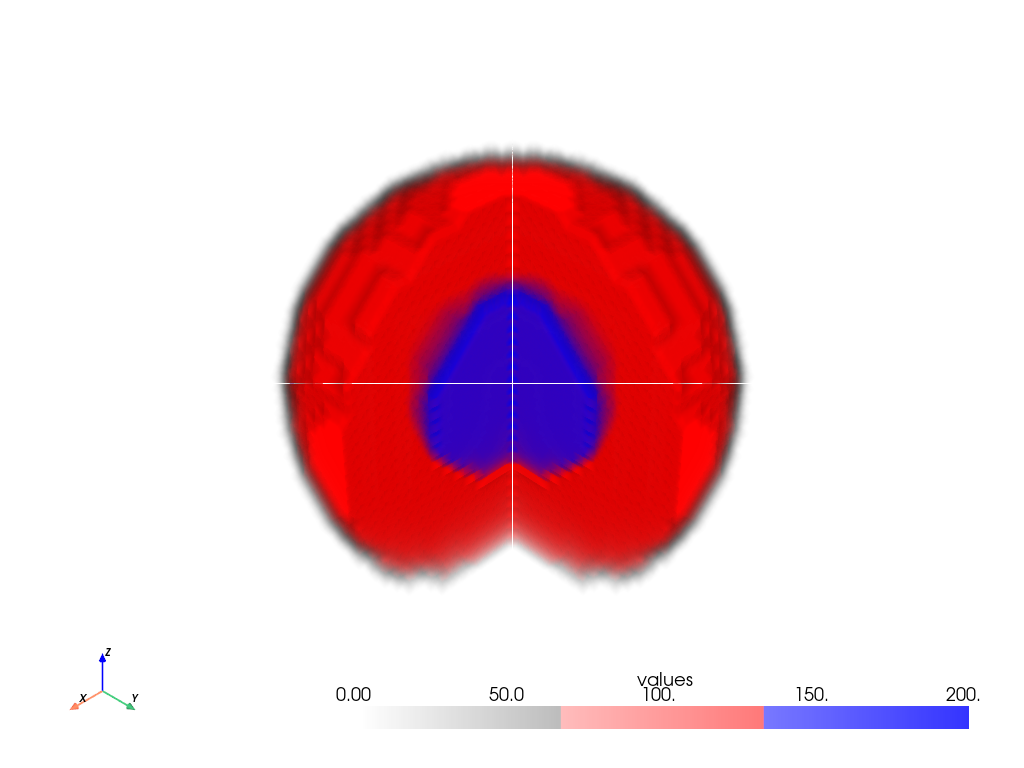

In [3]:
import numpy as np
import pyvista as pv

# 参数设置
nx, ny, nz = 30, 30, 30
R1 = min(nx, ny, nz) // 2
R2 = R1 // 2
center = 14.5

# 网格构建
x, y, z = np.mgrid[0:nx, 0:ny, 0:nz]
dx = x - center
dy = y - center
dz = z - center
r2 = dx**2 + dy**2 + dz**2
angle = np.arctan2(dy, dx)

# 创建标量场
volume = np.zeros_like(r2, dtype=np.uint8)
volume[(r2 <= R1**2) & (r2 > R2**2) & ~((angle >= 0) & (angle <= np.pi/2))] = 100  # 外层红色
volume[(r2 <= R2**2) & ~((angle >= 0) & (angle <= np.pi/2))] = 200  # 内层蓝色

# 转为 PyVista 格式
grid = pv.wrap(volume)
grid = grid.cast_to_unstructured_grid()

# 渲染
plotter = pv.Plotter()
plotter.add_volume(grid, cmap=["black", "red", "blue"], opacity=[0, 0.4, 0.8])
plotter.add_axes()
plotter.show()



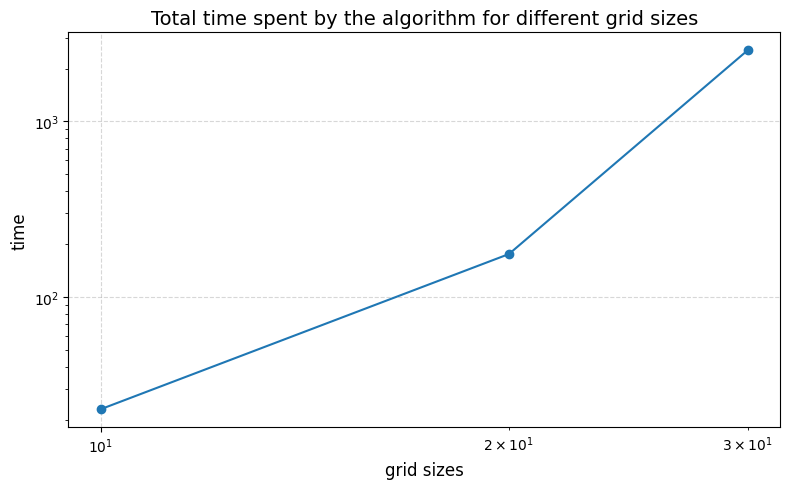

In [8]:
import matplotlib.pyplot as plt

# 示例数据：网格大小 vs. 总耗时（秒）
grid_sizes = [10, 20, 30]      # 例如 30³、50³……
runtimes   = [23, 175.8,2542.8]  # 对应的运行时间

plt.figure(figsize=(8, 5))
plt.plot(grid_sizes, runtimes, marker='o', linestyle='-')
plt.title('Total time spent by the algorithm for different grid sizes', fontsize=14)
plt.xlabel('grid sizes', fontsize=12)
plt.ylabel('time', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# 如果跨度很大，可考虑用对数坐标：
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()
